In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import pickle
import math
from textblob import TextBlob
import matplotlib.pyplot as plt


### **Sentiment Analysis**

In [2]:
# Reading the pickle files
data = pd.read_pickle('comedians_cleaned_data.pkl')
comedians = ['Dave Chappelle','Bill Burr', 'Jim Jefferies', 'John Mulaney','Anthony Jeselnik', 'Mike Birbiglia','Joe Rogan']
data

,Comedians,Transcript
0,Dave Chappelle,this is dave he tell dirty joke for a living t...
1,Bill Burr,cheer and applause all right thank you thank y...
2,Jim Jefferies,car horn honk audience cheering announcer lady...
3,John Mulaney,armed with boyish charm and a sharp wit the fo...
4,Anthony Jeselnik,thank you thank you thank you san francisco th...
5,Mike Birbiglia,wow hey thank you thanks thank you guy hey sea...
6,Joe Rogan,rock music playingaudience cheeringannouncerla...


In [3]:
# Finding the polarity and subjectivity for each comedian.
# Polarity is how much positive or negative a comedian is speaking about.
# Subjectivity is wether a comedian is talkong about his personal opinion and emotions.

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['Transcript'].apply(pol)
data['subjectivity'] = data['Transcript'].apply(sub)
data

,Comedians,Transcript,polarity,subjectivity
0,Dave Chappelle,this is dave he tell dirty joke for a living t...,-0.002965,0.514616
1,Bill Burr,cheer and applause all right thank you thank y...,0.009056,0.541355
2,Jim Jefferies,car horn honk audience cheering announcer lady...,0.038170,0.526893
3,John Mulaney,armed with boyish charm and a sharp wit the fo...,0.071637,0.490769
4,Anthony Jeselnik,thank you thank you thank you san francisco th...,0.047405,0.564934
5,Mike Birbiglia,wow hey thank you thanks thank you guy hey sea...,0.080103,0.523946
6,Joe Rogan,rock music playingaudience cheeringannouncerla...,0.073705,0.539960


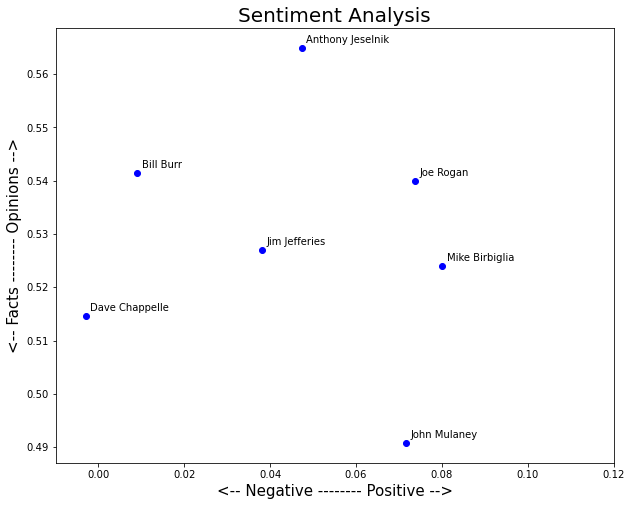

In [4]:
# Plot for polarity v/s subjectivity

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, comedians[index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [5]:
# Function to split transcripts into n number of parts
def split_text(text, n):
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
list_pieces = []
for t in data.Transcript:
    split = split_text(t,10)
    list_pieces.append(split)

In [7]:
# List pieces is a 2D list which contains 10 parts of transcript for each comedian
print(len(list_pieces)) # Number of comedians
print(len(list_pieces[0])) # Number of pieces of each transcript

7
10


In [8]:
# Analizing polarity after dividing the transcript into 10 parts
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

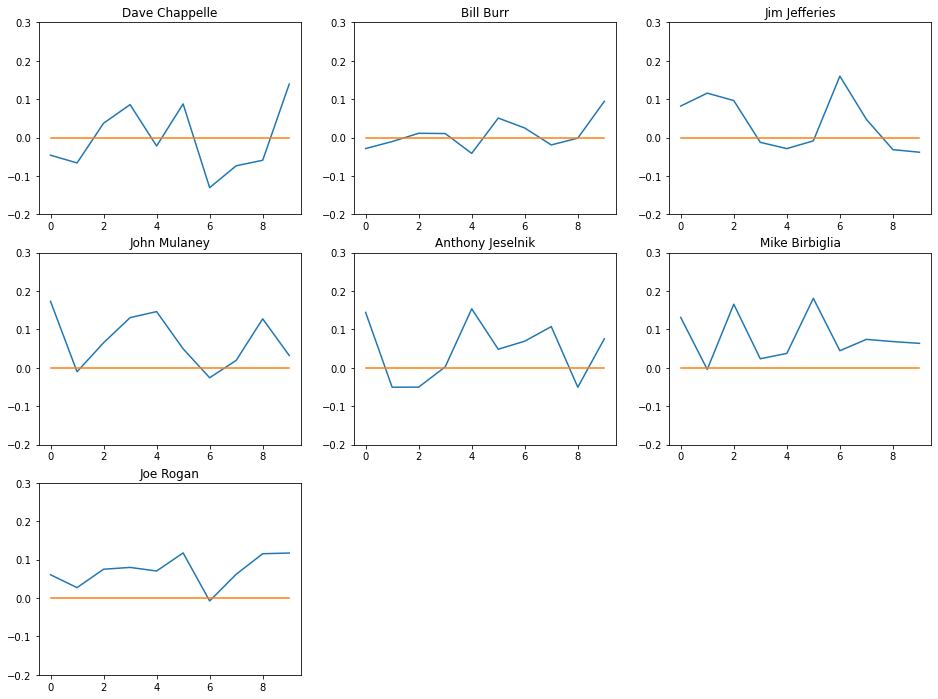

In [9]:
# Plot of polarity of comedians after dividing each transcript into 10 parts
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['Comedians'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

# Conclusion:


*   Mike Birbiglia and Joe Rogan rarely speaks negative in their routine.
*   Dave Chappelle speaks negative for most of the times 
*   Bill Burr stay positve for half of the time.
*   Other comedians generally stay positive in their routine.


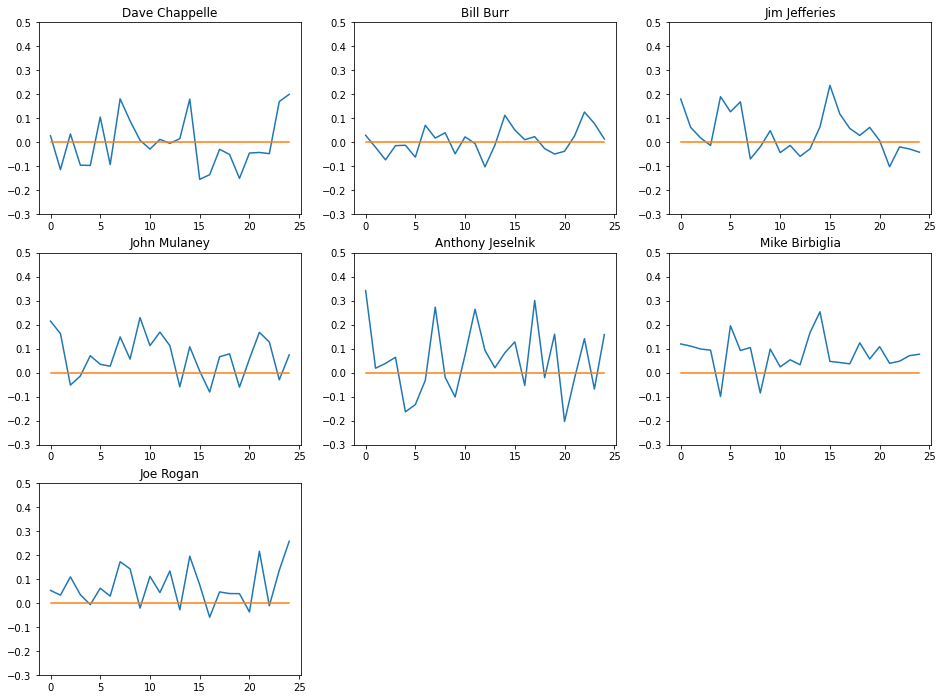

In [10]:
# Observing Polarity and Subjectivity by dividing transcripts into 25 parts
list_pieces = []
for t in data.Transcript:
    split = split_text(t,25)
    list_pieces.append(split)
    
polarity_transcript_2 = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript_2.append(polarity_piece)


plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 3, index+1)
    plt.plot(polarity_transcript_2[index])
    plt.plot(np.arange(0,25), np.zeros(25))
    plt.title(data['Comedians'][index])
    plt.ylim(ymin=-.3, ymax=.5)
    
plt.show()